UPLIFT МОДЕЛИРОВАНИЕ НА ДАННЫХ HILLSTROM

Структура датасета:
- Данные (X): (64000, 8)
- Целевая переменная (y): (64000,)
- Лечение (treatment): (64000,)
- Описание датасета: Kevin Hillstrom Dataset: MineThatData

Data description
################

This is a copy of `MineThatData E-Mail Analytics And Data Mining Challenge dataset <http...

Размер полного датасета: (64000, 10)

Типы данных:
recency              int64
history_segment     object
history            float64
mens                 int64
womens               int64
zip_code            object
newbie               int64
channel             object
target               int64
treatment           object
dtype: object

Первые 5 строк:
   recency history_segment  history  mens  womens   zip_code  newbie channel  \
0       10  2) $100 - $200   142.44     1       0  Surburban       0   Phone   
1        6  3) $200 - $350   329.08     1       1      Rural       1     Web   
2        7  2) $100 - $200   180.65     0       1  Surburban      

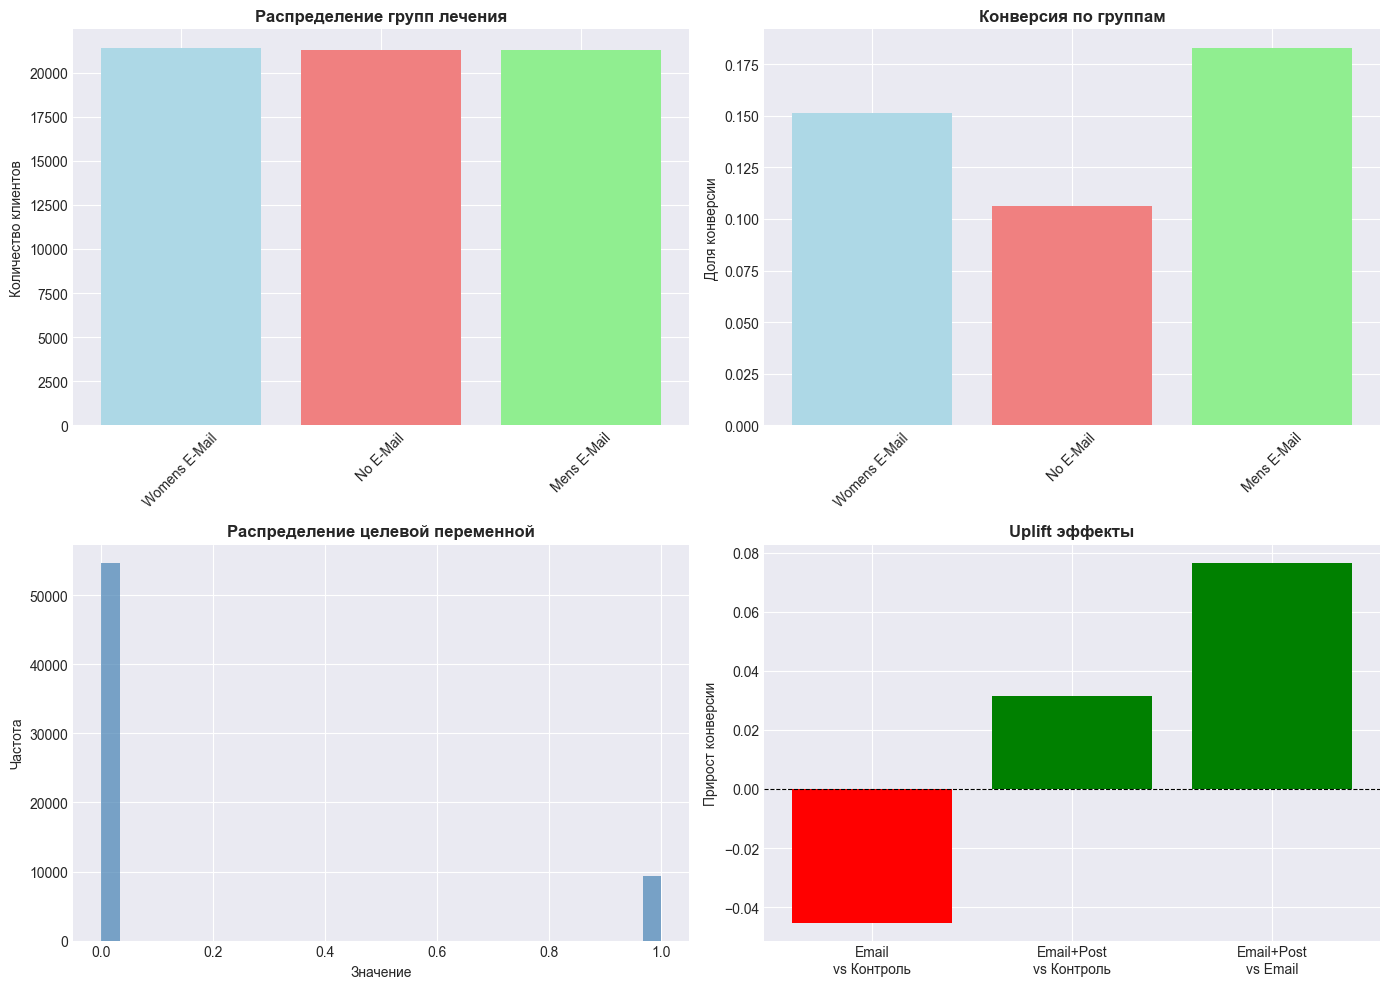


АНАЛИЗ ПРИЗНАКОВ:

Статистика по числовым признакам:
        recency  history_segment   history      mens    womens  zip_code  \
count  64000.00              0.0  64000.00  64000.00  64000.00       0.0   
mean       5.76              NaN    242.09      0.55      0.55       NaN   
std        3.51              NaN    256.16      0.50      0.50       NaN   
min        1.00              NaN     29.99      0.00      0.00       NaN   
25%        2.00              NaN     64.66      0.00      0.00       NaN   
50%        6.00              NaN    158.11      1.00      1.00       NaN   
75%        9.00              NaN    325.66      1.00      1.00       NaN   
max       12.00              NaN   3345.93      1.00      1.00       NaN   

        newbie  channel    target  
count  64000.0      0.0  64000.00  
mean       0.5      NaN      0.15  
std        0.5      NaN      0.35  
min        0.0      NaN      0.00  
25%        0.0      NaN      0.00  
50%        1.0      NaN      0.00  
75%      

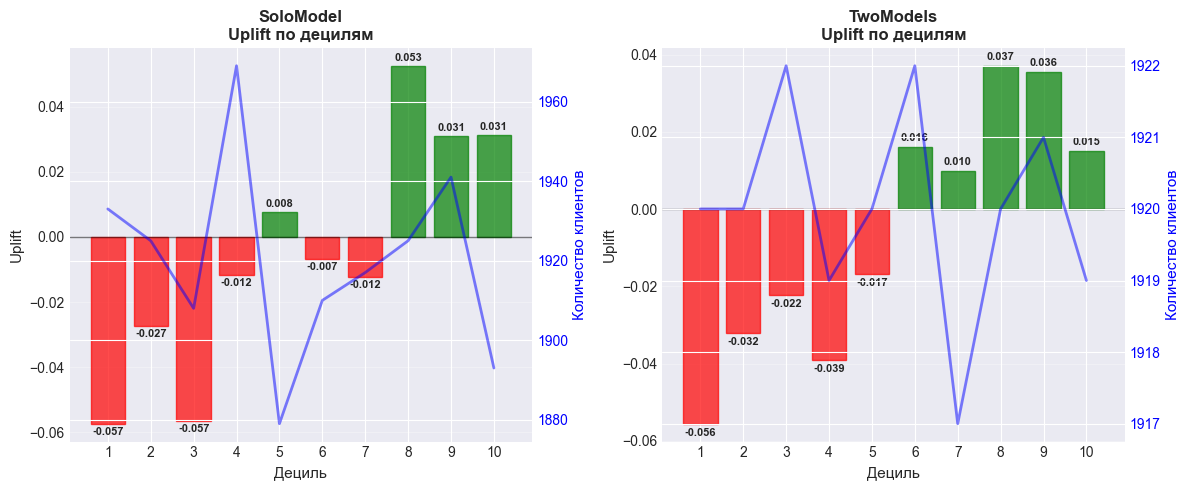


СЕГМЕНТАЦИЯ ДЛЯ КАЖДОЙ МОДЕЛИ


SoloModel:

СЕГМЕНТАЦИЯ КЛИЕНТОВ (SoloModel)

Границы сегментов:
  20-й перцентиль: -0.0242
  50-й перцентиль (медиана): -0.0005
  80-й перцентиль: 0.0130

Распределение клиентов по сегментам:
  Уверенные: 3976 клиентов (20.7%)
  Убеждаемые: 5467 клиентов (28.5%)
  Равнодушные: 5931 клиентов (30.9%)
  Антагонисты: 3826 клиентов (19.9%)

Анализ эффективности по сегментам:

    Сегмент  Клиентов  % от общего  Конверсия_контроль  Конверсия_лечение  Uplift
  Уверенные      3976      20.7083              0.1441             0.1758  0.0316
 Убеждаемые      5467      28.4740              0.1260             0.1347  0.0087
Равнодушные      5931      30.8906              0.1729             0.1558 -0.0171
Антагонисты      3826      19.9271              0.1610             0.1164 -0.0446


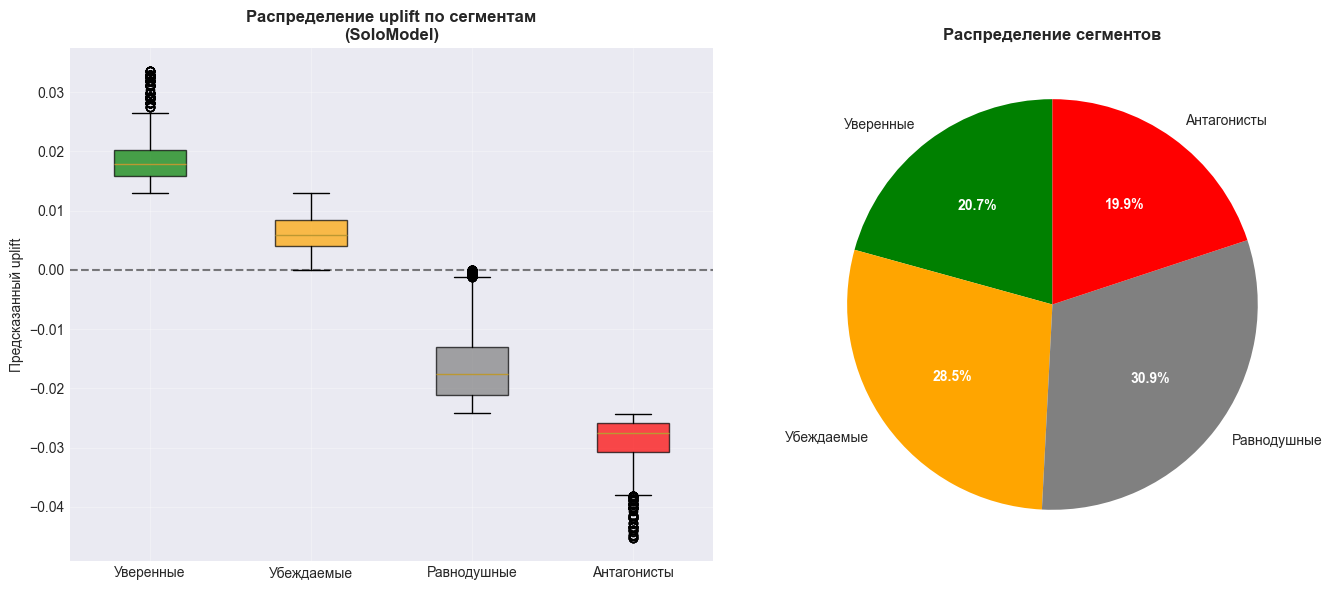



TwoModels:

СЕГМЕНТАЦИЯ КЛИЕНТОВ (TwoModels)

Границы сегментов:
  20-й перцентиль: -0.0429
  50-й перцентиль (медиана): -0.0138
  80-й перцентиль: 0.0272

Распределение клиентов по сегментам:
  Уверенные: 3840 клиентов (20.0%)
  Убеждаемые: 4610 клиентов (24.0%)
  Равнодушные: 6910 клиентов (36.0%)
  Антагонисты: 3840 клиентов (20.0%)

Анализ эффективности по сегментам:

    Сегмент  Клиентов  % от общего  Конверсия_контроль  Конверсия_лечение  Uplift
  Уверенные      3840      20.0000              0.1481             0.1735  0.0254
 Убеждаемые      4610      24.0104              0.1035             0.1255  0.0219
Равнодушные      6910      35.9896              0.1630             0.1442 -0.0188
Антагонисты      3840      20.0000              0.1910             0.1469 -0.0441


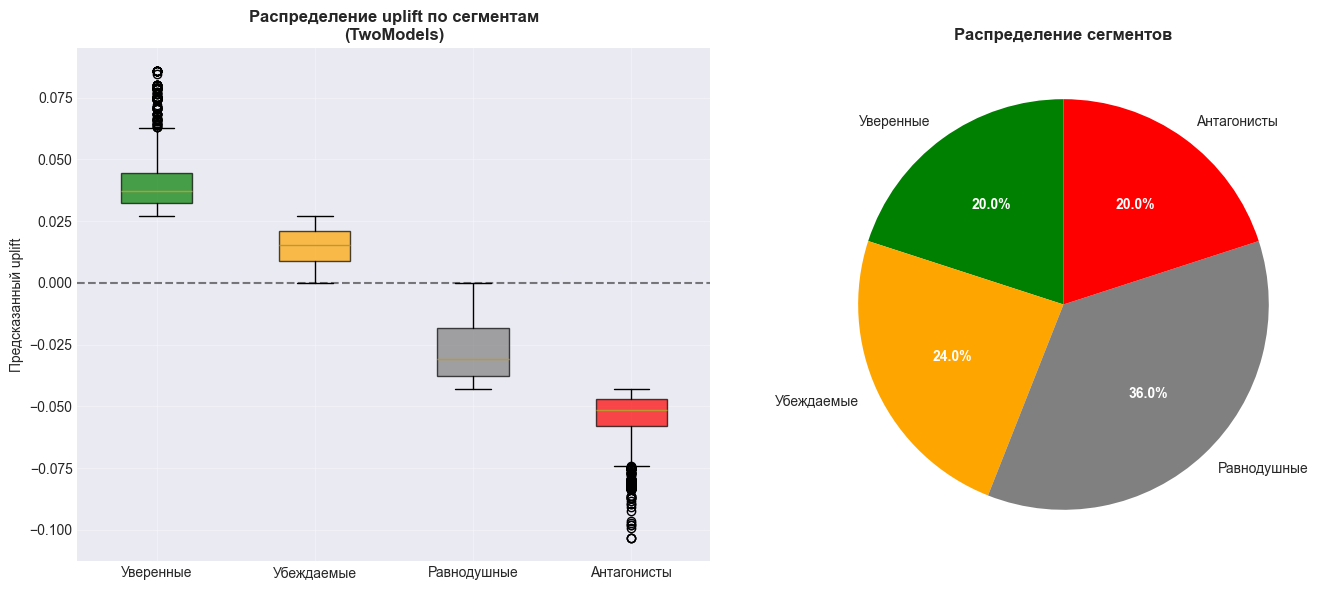

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklift.datasets import fetch_hillstrom
from sklift.models import SoloModel, TwoModels
from sklift.metrics import uplift_at_k, uplift_auc_score
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# 1. Загрузка и изучение датасета
def load_and_explore_data():

    dataset = fetch_hillstrom()

    # Структура датасета Hillstrom
    print("\nСтруктура датасета:")
    print(f"- Данные (X): {dataset.data.shape}")
    print(f"- Целевая переменная (y): {dataset.target.shape}")
    print(f"- Лечение (treatment): {dataset.treatment.shape}")
    print(f"- Описание датасета: {dataset.DESCR[:200]}...")
    
    # Преобразование в DataFrame
    X_df = dataset.data.copy()
    y_series = pd.Series(dataset.target, name='target')
    treatment_series = pd.Series(dataset.treatment, name='treatment')
    
    # Объединение для анализа
    data = pd.concat([X_df, y_series, treatment_series], axis=1)
    
    print(f"\nРазмер полного датасета: {data.shape}")
    print(f"\nТипы данных:")
    print(data.dtypes)
    print(f"\nПервые 5 строк:")
    print(data.head())
    
    # Проверка уникальных значений в каждой колонке
    print(f"\nУникальные значения в колонках:")
    for col in data.columns:
        unique_vals = data[col].unique()[:10]
        unique_count = len(data[col].unique())
        print(f"{col}: {unique_count} уникальных, тип: {data[col].dtype}, примеры: {unique_vals[:5]}")
    
    return X_df, y_series.values, treatment_series, data

# 2. EDA - Анализ данных
def perform_eda(data, treatment, y):
    
    print("\n" + "="*50)
    print("АНАЛИЗ БАЛАНСА ГРУПП:")
    print("="*50)
    
    # Преобразуем treatment к числовому формату если нужно
    if treatment.dtype == 'object':
        treatment_numeric = pd.factorize(treatment)[0]
        treatment_names = pd.factorize(treatment)[1]
        print(f"Лечение преобразовано из строк в коды: {dict(zip(treatment_names, range(len(treatment_names))))}")
    else:
        treatment_numeric = treatment.values
        treatment_names = np.unique(treatment_numeric)
    
    # Проверка баланса групп лечения
    treatment_counts = pd.Series(treatment_numeric).value_counts().sort_index()
    print("\nРаспределение по группам лечения:")
    for i, count in enumerate(treatment_counts):
        percentage = count / len(treatment_numeric) * 100
        treatment_name = treatment_names[i] if i < len(treatment_names) else f"Группа {i}"
        print(f"  {treatment_name}: {count} клиентов ({percentage:.1f}%)")
    
    # Распределение целевой переменной по группам
    print("\nКонверсия по группам:")
    conv_results = []
    
    for i in range(len(treatment_counts)):
        conv_rate = y[treatment_numeric == i].mean()
        conv_results.append(conv_rate)
        treatment_name = treatment_names[i] if i < len(treatment_names) else f"Группа {i}"
        print(f"  {treatment_name}: {conv_rate:.4f}")
    
    # Расчет uplift между группами
    print("\nUplift эффекты:")
    if len(conv_results) > 1:
        uplift_email = conv_results[1] - conv_results[0]
        print(f"  Email vs Контроль: {uplift_email:.4f}")
    if len(conv_results) > 2:
        uplift_email_post = conv_results[2] - conv_results[0]
        uplift_email_post_vs_email = conv_results[2] - conv_results[1]
        print(f"  Email+Post vs Контроль: {uplift_email_post:.4f}")
        print(f"  Email+Post vs Email: {uplift_email_post_vs_email:.4f}")
    
    # Визуализация
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # 1. Распределение групп лечения
    group_labels = [str(treatment_names[i]) if i < len(treatment_names) else f"Группа {i}" 
                   for i in range(len(treatment_counts))]
    axes[0, 0].bar(group_labels, treatment_counts.values, 
                   color=['lightblue', 'lightcoral', 'lightgreen'][:len(treatment_counts)])
    axes[0, 0].set_title('Распределение групп лечения', fontsize=12, fontweight='bold')
    axes[0, 0].set_ylabel('Количество клиентов')
    axes[0, 0].tick_params(axis='x', rotation=45)
    
    # 2. Конверсия по группам
    axes[0, 1].bar(group_labels, conv_results,
                   color=['lightblue', 'lightcoral', 'lightgreen'][:len(conv_results)])
    axes[0, 1].set_title('Конверсия по группам', fontsize=12, fontweight='bold')
    axes[0, 1].set_ylabel('Доля конверсии')
    axes[0, 1].tick_params(axis='x', rotation=45)
    
    # 3. Распределение целевой переменной
    axes[1, 0].hist(y, bins=30, alpha=0.7, color='steelblue')
    axes[1, 0].set_title('Распределение целевой переменной', fontsize=12, fontweight='bold')
    axes[1, 0].set_xlabel('Значение')
    axes[1, 0].set_ylabel('Частота')
    
    # 4. Uplift эффекты
    uplift_effects = []
    uplift_labels = []
    
    if len(conv_results) > 1:
        uplift_effects.append(conv_results[1] - conv_results[0])
        uplift_labels.append('Email\nvs Контроль')
    
    if len(conv_results) > 2:
        uplift_effects.append(conv_results[2] - conv_results[0])
        uplift_labels.append('Email+Post\nvs Контроль')
        
        uplift_effects.append(conv_results[2] - conv_results[1])
        uplift_labels.append('Email+Post\nvs Email')
    
    if uplift_effects:
        colors = ['green' if x >= 0 else 'red' for x in uplift_effects]
        axes[1, 1].bar(uplift_labels, uplift_effects, color=colors)
        axes[1, 1].set_title('Uplift эффекты', fontsize=12, fontweight='bold')
        axes[1, 1].set_ylabel('Прирост конверсии')
        axes[1, 1].axhline(y=0, color='black', linewidth=0.8, linestyle='--')
    
    plt.tight_layout()
    plt.show()
    
    # Анализ признаков
    print("\n" + "="*50)
    print("АНАЛИЗ ПРИЗНАКОВ:")
    print("="*50)
    
    # Преобразуем все числовые колонки к numeric
    for col in data.columns:
        if col not in ['treatment', 'target']:
            try:
                data[col] = pd.to_numeric(data[col], errors='coerce')
            except:
                pass
    
    numeric_cols = data.select_dtypes(include=[np.number]).columns
    if len(numeric_cols) > 0:
        print(f"\nСтатистика по числовым признакам:")
        numeric_stats = data[numeric_cols].describe().round(2)
        print(numeric_stats)
    
    categorical_cols = data.select_dtypes(include=['object', 'category']).columns
    if len(categorical_cols) > 0:
        print(f"\nКатегориальные признаки:")
        for col in categorical_cols:
            print(f"\n{col}:")
            print(data[col].value_counts().head())
    
    return conv_results, treatment_names, treatment_numeric

# 3. Подготовка данных для моделирования
def prepare_data(X, y, treatment, test_size=0.3, random_state=42):
    """Подготовка данных для uplift моделирования"""
    
    print("\n" + "="*50)
    print("ПОДГОТОВКА ДАННЫХ")
    print("="*50)
    
    X_df = X.copy()
    
    # Очистка и преобразование данных
    print("Очистка и преобразование данных...")
    
    # Преобразуем все колонки к правильным типам данных
    for col in X_df.columns:
        # Пробуем преобразовать к numeric
        try:
            X_df[col] = pd.to_numeric(X_df[col], errors='coerce')
        except:
            pass
        
        # Если колонка стала numeric, заполняем пропуски
        if pd.api.types.is_numeric_dtype(X_df[col]):
            X_df[col] = X_df[col].fillna(X_df[col].median())
        else:
            # Для категориальных заполняем самым частым значением
            X_df[col] = X_df[col].fillna(X_df[col].mode()[0] if not X_df[col].mode().empty else 'missing')
    
    # Кодирование категориальных признаков
    categorical_cols = X_df.select_dtypes(include=['object', 'category']).columns
    label_encoders = {}
    
    print(f"\nКатегориальные признаки для кодирования: {list(categorical_cols)}")
    
    for col in categorical_cols:
        le = LabelEncoder()
        X_df[col] = le.fit_transform(X_df[col].astype(str))
        label_encoders[col] = le
        print(f"  {col}: закодировано {len(le.classes_)} уникальных значений")
    
    # Масштабирование числовых признаков
    numeric_cols = X_df.select_dtypes(include=[np.number]).columns
    
    if len(numeric_cols) > 0:
        scaler = StandardScaler()
        X_df[numeric_cols] = scaler.fit_transform(X_df[numeric_cols])
        print(f"\nМасштабирование применено к {len(numeric_cols)} числовым признакам")
    
    # Для uplift моделирования используем бинарное лечение
    # Преобразуем treatment к числовому формату если нужно
    if isinstance(treatment, pd.Series):
        if treatment.dtype == 'object':
            # Кодируем строковые значения лечения
            treatment_encoded = pd.factorize(treatment)[0]
            print(f"Лечение закодировано: {dict(zip(pd.factorize(treatment)[1], range(len(pd.factorize(treatment)[1]))))}")
        else:
            treatment_encoded = treatment.values
    else:
        treatment_encoded = treatment
    
    # Преобразуем в бинарный случай: контроль (0) vs лечение (1)
    # В Hillstrom: контроль = 0 или 'No E-Mail', лечение = все остальное
    treatment_binary = (treatment_encoded > 0).astype(int)
    
    print(f"\nБинаризация лечения:")
    print(f"  Контроль (0): {(treatment_binary == 0).sum()} клиентов")
    print(f"  Лечение (1): {(treatment_binary == 1).sum()} клиентов")
    
    # Разделение данных
    X_train, X_test, y_train, y_test, treat_train, treat_test = train_test_split(
        X_df, y, treatment_binary,
        test_size=test_size,
        random_state=random_state,
        stratify=treatment_binary
    )
    
    print(f"\nРазделение данных:")
    print(f"  Тренировочная выборка: {X_train.shape}")
    print(f"  Тестовая выборка: {X_test.shape}")
    print(f"  Конверсия в тренировочной: {y_train.mean():.4f}")
    print(f"  Конверсия в тестовой: {y_test.mean():.4f}")
    print(f"  Лечение в тренировочной: {treat_train.mean():.4f}")
    print(f"  Лечение в тестовой: {treat_test.mean():.4f}")
    
    return X_train, X_test, y_train, y_test, treat_train, treat_test, label_encoders

# 4. Uplift моделирование
def build_uplift_models(X_train, X_test, y_train, y_test, treat_train, treat_test):
    """Построение uplift моделей"""
    
    print("\n" + "="*50)
    print("ПОСТРОЕНИЕ UPLIFT МОДЕЛЕЙ")
    print("="*50)
    
    # Настройка базового классификатора
    base_model = RandomForestClassifier(
        n_estimators=50,
        max_depth=5,
        min_samples_leaf=50,
        random_state=42,
        n_jobs=-1
    )
    
    models_dict = {}
    
    # Модель 1: SoloModel (S-learner)
    print("\n1. SoloModel (S-learner):")
    try:
        sm_model = SoloModel(estimator=base_model)
        
        sm_model.fit(
            X=X_train,
            y=y_train,
            treatment=treat_train
        )
        
        sm_pred = sm_model.predict(X_test)
        models_dict['SoloModel'] = (sm_model, sm_pred)
        print("  Модель обучена успешно")
    except Exception as e:
        print(f"  Ошибка при обучении SoloModel: {e}")
    
    # Модель 2: TwoModels (T-learner)
    print("\n2. TwoModels (T-learner):")
    try:
        tm_model = TwoModels(
            estimator_trmnt=RandomForestClassifier(n_estimators=50, max_depth=5, 
                                                   min_samples_leaf=50, random_state=42),
            estimator_ctrl=RandomForestClassifier(n_estimators=50, max_depth=5, 
                                                  min_samples_leaf=50, random_state=42),
            method='vanilla'
        )
        
        tm_model.fit(
            X=X_train,
            y=y_train,
            treatment=treat_train
        )
        
        tm_pred = tm_model.predict(X_test)
        models_dict['TwoModels'] = (tm_model, tm_pred)
        print("  Модель обучена успешно")
    except Exception as e:
        print(f"  Ошибка при обучении TwoModels: {e}")
    
    return models_dict

# 5. Оценка качества моделей
def evaluate_models(y_test, treat_test, models_dict):
    """Оценка качества uplift моделей"""
    
    print("\n" + "="*50)
    print("ОЦЕНКА КАЧЕСТВА МОДЕЛЕЙ")
    print("="*50)
    
    results = []
    
    for model_name, (model, predictions) in models_dict.items():
        print(f"\n{model_name}:")
        
        # AUQC (Area Under Uplift Curve)
        try:
            auqc = uplift_auc_score(
                y_true=y_test,
                uplift=predictions,
                treatment=treat_test
            )
            print(f"  AUQC: {auqc:.4f}")
        except Exception as e:
            print(f"  AUQC: ошибка расчета - {e}")
            auqc = np.nan
        
        # Uplift@K для разных K
        uplift_scores = {}
        k_values = [0.1, 0.2, 0.3, 0.5]
        
        for k in k_values:
            try:
                uplift_k = uplift_at_k(
                    y_true=y_test,
                    uplift=predictions,
                    treatment=treat_test,
                    k=k
                )
                uplift_scores[f'Uplift@{int(k*100)}%'] = uplift_k
                print(f"  Uplift@{int(k*100)}%: {uplift_k:.4f}")
            except Exception as e:
                uplift_scores[f'Uplift@{int(k*100)}%'] = np.nan
                print(f"  Uplift@{int(k*100)}%: ошибка расчета")
        
        results.append({
            'Model': model_name,
            'AUQC': auqc,
            **uplift_scores
        })
    
    # Децильный анализ
    print("\n" + "="*50)
    print("ДЕЦИЛЬНЫЙ АНАЛИЗ")
    print("="*50)
    
    if len(models_dict) > 0:
        fig, axes = plt.subplots(1, len(models_dict), figsize=(6*len(models_dict), 5))
        
        if len(models_dict) == 1:
            axes = [axes]
        
        for idx, (model_name, (model, predictions)) in enumerate(models_dict.items()):
            # Создание децилей
            try:
                deciles = pd.qcut(predictions, q=10, labels=False, duplicates='drop')
                
                # Расчет uplift в каждом дециле
                uplift_by_decile = []
                counts_by_decile = []
                
                for decile in range(10):
                    mask = (deciles == decile)
                    if mask.sum() > 0:
                        conv_test_group = y_test[mask & (treat_test == 1)].mean()
                        conv_control = y_test[mask & (treat_test == 0)].mean()
                        uplift = conv_test_group - conv_control
                        uplift_by_decile.append(uplift)
                        counts_by_decile.append(mask.sum())
                    else:
                        uplift_by_decile.append(0)
                        counts_by_decile.append(0)
                
                # Визуализация
                ax = axes[idx]
                bars = ax.bar(range(1, 11), uplift_by_decile, color='lightgray')
                
                # Раскраска по uplift
                for i, bar in enumerate(bars):
                    if uplift_by_decile[i] > 0:
                        bar.set_color('green')
                        bar.set_alpha(0.7)
                    elif uplift_by_decile[i] < 0:
                        bar.set_color('red')
                        bar.set_alpha(0.7)
                
                ax.set_xlabel('Дециль', fontsize=11)
                ax.set_ylabel('Uplift', fontsize=11)
                ax.set_title(f'{model_name}\nUplift по децилям', fontsize=12, fontweight='bold')
                ax.axhline(y=0, color='black', linestyle='-', alpha=0.5, linewidth=1)
                ax.grid(True, alpha=0.3, axis='y')
                ax.set_xticks(range(1, 11))
                
                # Добавление значений
                for i, v in enumerate(uplift_by_decile):
                    if not np.isnan(v):
                        ax.text(i + 1, v + (0.001 if v >= 0 else -0.001), 
                               f'{v:.3f}', ha='center', va='bottom' if v >= 0 else 'top', 
                               fontsize=8, fontweight='bold')
                
                # Второй график: количество клиентов в дециле
                ax2 = ax.twinx()
                ax2.plot(range(1, 11), counts_by_decile, 'b-', alpha=0.5, linewidth=2)
                ax2.set_ylabel('Количество клиентов', fontsize=11, color='blue')
                ax2.tick_params(axis='y', labelcolor='blue')
                
            except Exception as e:
                print(f"  Ошибка при децильном анализе для {model_name}: {e}")
        
        plt.tight_layout()
        plt.show()
    else:
        print("Нет обученных моделей для анализа")
    
    return pd.DataFrame(results)

# 6. Сегментация клиентов
def segment_clients(uplift_predictions, y_test=None, treat_test=None, model_name=""):
    """Сегментация клиентов на основе uplift предсказаний"""
    
    print("\n" + "="*50)
    print(f"СЕГМЕНТАЦИЯ КЛИЕНТОВ ({model_name})")
    print("="*50)
    
    # Определение границ сегментов
    percentiles = [0.2, 0.5, 0.8]
    boundaries = np.percentile(uplift_predictions, [p * 100 for p in percentiles])
    
    print(f"\nГраницы сегментов:")
    print(f"  20-й перцентиль: {boundaries[0]:.4f}")
    print(f"  50-й перцентиль (медиана): {boundaries[1]:.4f}")
    print(f"  80-й перцентиль: {boundaries[2]:.4f}")
    
    # Назначение сегментов
    segments = np.where(
        uplift_predictions < boundaries[0], 'Антагонисты',
        np.where(
            uplift_predictions < 0, 'Равнодушные',
            np.where(
                uplift_predictions < boundaries[2], 'Убеждаемые',
                'Уверенные'
            )
        )
    )
    
    # Анализ распределения сегментов
    segment_counts = pd.Series(segments).value_counts()
    segment_percentages = segment_counts / len(segments) * 100
    
    print("\nРаспределение клиентов по сегментам:")
    segment_order = ['Уверенные', 'Убеждаемые', 'Равнодушные', 'Антагонисты']
    
    for segment in segment_order:
        if segment in segment_counts:
            count = segment_counts[segment]
            percentage = segment_percentages[segment]
            print(f"  {segment}: {count} клиентов ({percentage:.1f}%)")
    
    # Анализ конверсии по сегментам
    if y_test is not None and treat_test is not None:
        print("\nАнализ эффективности по сегментам:")
        results = []
        
        for segment in segment_order:
            if segment in segment_counts:
                mask = segments == segment
                if mask.sum() > 0:
                    conv_control = y_test[mask & (treat_test == 0)].mean()
                    conv_test_group = y_test[mask & (treat_test == 1)].mean()
                    uplift = conv_test_group - conv_control
                    
                    results.append({
                        'Сегмент': segment,
                        'Клиентов': mask.sum(),
                        '% от общего': mask.sum()/len(segments)*100,
                        'Конверсия_контроль': conv_control,
                        'Конверсия_лечение': conv_test_group,
                        'Uplift': uplift
                    })
        
        if results:
            results_df = pd.DataFrame(results)
            print("\n" + results_df.to_string(index=False, float_format=lambda x: f'{x:.4f}' if isinstance(x, (float, np.float64)) else str(x)))
    
    # Визуализация сегментов
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    # 1. Распределение uplift по сегментам
    segment_colors = {
        'Антагонисты': 'red',
        'Равнодушные': 'gray',
        'Убеждаемые': 'orange',
        'Уверенные': 'green'
    }
    
    # Boxplot по сегментам
    segment_data = []
    segment_labels = []
    
    for segment in segment_order:
        if segment in segment_counts:
            mask = segments == segment
            segment_data.append(uplift_predictions[mask])
            segment_labels.append(segment)
    
    if segment_data:
        bp = axes[0].boxplot(segment_data, labels=segment_labels, patch_artist=True)
        
        # Раскраска boxplot
        for i, (patch, segment) in enumerate(zip(bp['boxes'], segment_labels)):
            patch.set_facecolor(segment_colors[segment])
            patch.set_alpha(0.7)
        
        axes[0].axhline(y=0, color='black', linestyle='--', alpha=0.5)
        axes[0].set_title(f'Распределение uplift по сегментам\n({model_name})', fontsize=12, fontweight='bold')
        axes[0].set_ylabel('Предсказанный uplift')
        axes[0].grid(True, alpha=0.3)
    
    # 2. Круговой график распределения сегментов
    if not segment_counts.empty:
        wedges, texts, autotexts = axes[1].pie(
            [segment_counts.get(s, 0) for s in segment_order],
            labels=segment_order,
            autopct='%1.1f%%',
            colors=[segment_colors.get(s, 'gray') for s in segment_order],
            startangle=90
        )
        
        # Улучшение отображения процентов
        for autotext in autotexts:
            autotext.set_color('white')
            autotext.set_fontweight('bold')
        
        axes[1].set_title('Распределение сегментов', fontsize=12, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    return segments, segment_counts, boundaries

# Главная функция
def main():
    """Основной пайплайн uplift моделирования"""
    
    print("="*50)
    print("UPLIFT МОДЕЛИРОВАНИЕ НА ДАННЫХ HILLSTROM")
    print("="*50)
    
    # 1. Загрузка данных
    X, y, treatment, data = load_and_explore_data()
    
    # 2. EDA
    conv_results, treatment_names, treatment_numeric = perform_eda(data, treatment, y)
    
    # 3. Подготовка данных
    X_train, X_test, y_train, y_test, treat_train, treat_test, label_encoders = prepare_data(
        X, y, treatment
    )
    
    # 4. Построение моделей
    models_dict = build_uplift_models(
        X_train, X_test, y_train, y_test, treat_train, treat_test
    )
    
    # 5. Оценка качества
    if models_dict:
        evaluation_results = evaluate_models(y_test, treat_test, models_dict)
    else:
        print("Модели не были обучены, пропускаем оценку качества")
        evaluation_results = pd.DataFrame()
    
    # 6. Сегментация клиентов для каждой модели
    print("\n" + "="*50)
    print("СЕГМЕНТАЦИЯ ДЛЯ КАЖДОЙ МОДЕЛИ")
    print("="*50)
    
    segmentation_results = {}
    
    for model_name, (model, predictions) in models_dict.items():
        print(f"\n\n{model_name}:")
        segments, segment_counts, boundaries = segment_clients(
            predictions, y_test, treat_test, model_name
        )
        segmentation_results[model_name] = {
            'segments': segments,
            'counts': segment_counts,
            'boundaries': boundaries
        }
    
   
if __name__ == "__main__":
    main()